In [1]:
#Step 1: Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("netflix1.csv")
df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
#Step 2: Basic Info & Data Cleaning
# Overview
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert date column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Handle missing critical columns (if any)
df.dropna(subset=['title', 'type', 'country', 'director', 'rating'], inplace=True)

# Create new time-based columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None

Missing values:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_14448\3009371970.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


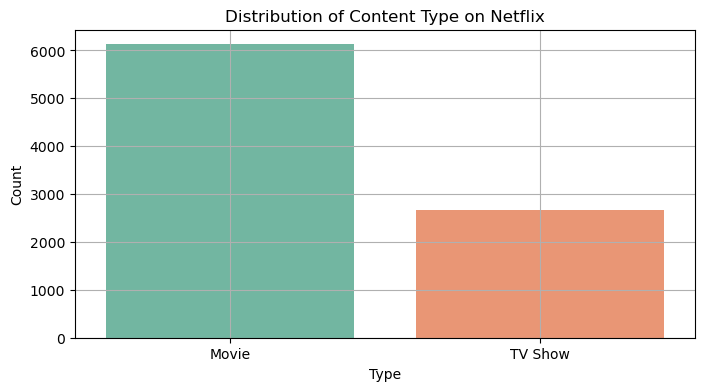

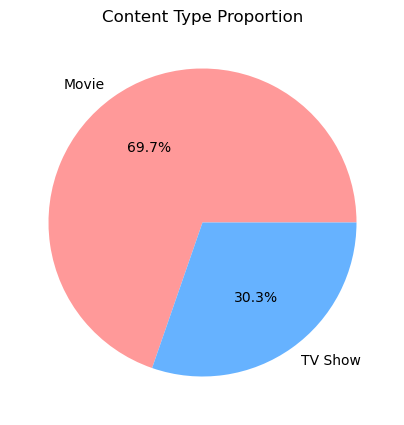

In [5]:
#Step 3: Content Type Distribution
type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'])
plt.title("Content Type Proportion")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_14448\1682537487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='muted')


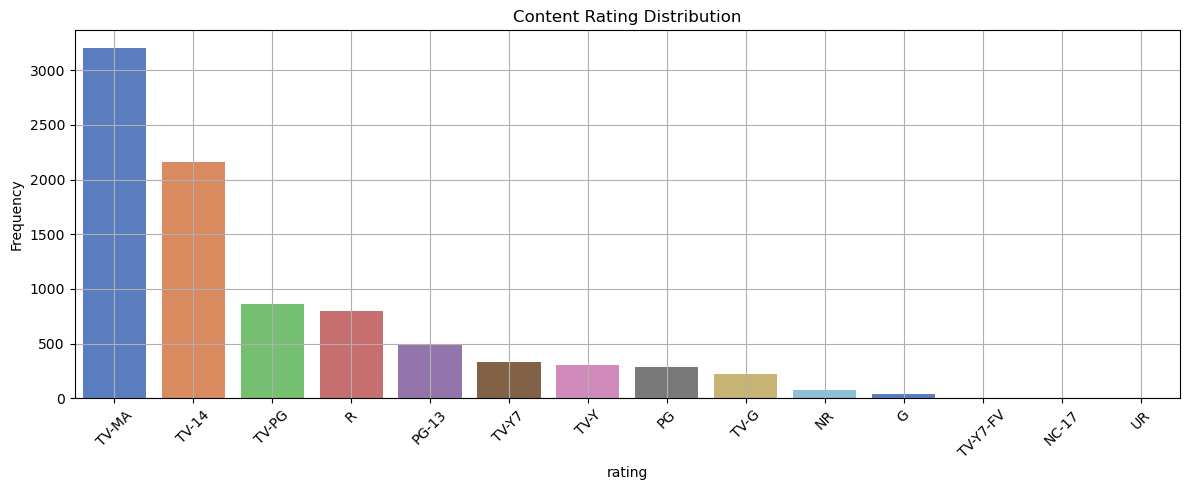

In [7]:
#Step 4: Rating Distribution
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='muted')
plt.title("Content Rating Distribution")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_14448\1661852302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


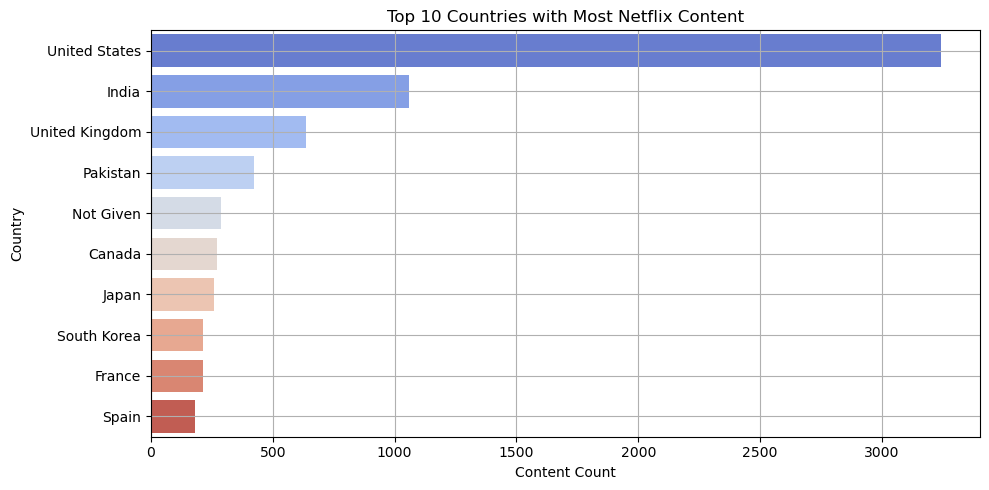

In [9]:
#Step 5: Top 10 Countries by Content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Content Count")
plt.ylabel("Country")
plt.grid(True)
plt.tight_layout()
plt.show()


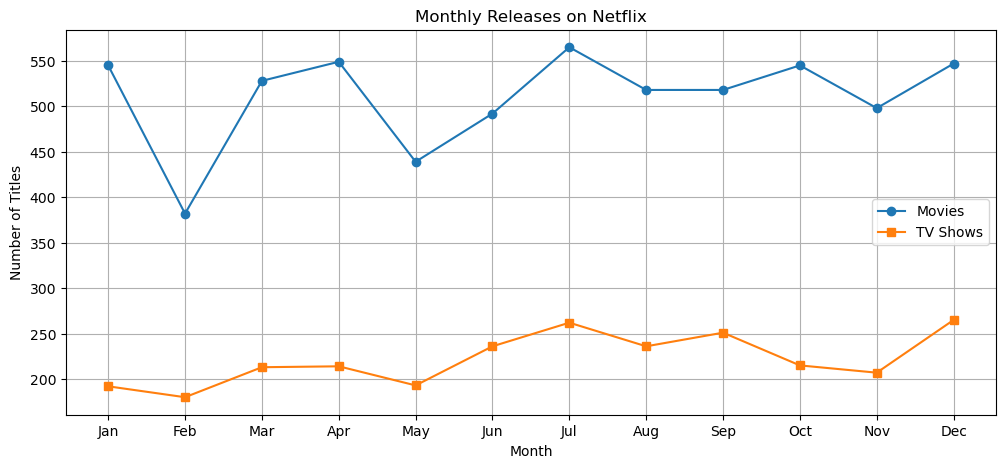

<Figure size 1200x600 with 0 Axes>

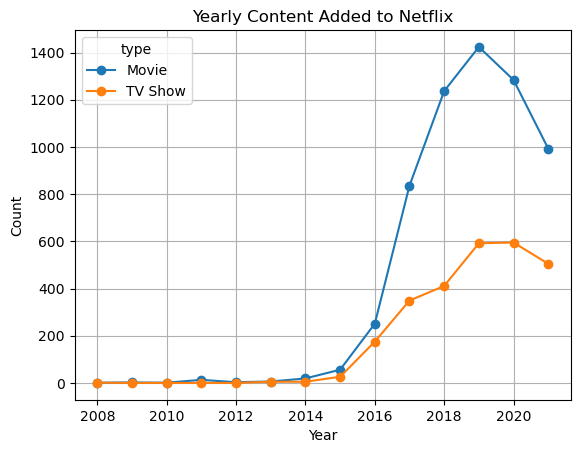

In [11]:
#Step 6: Monthly and Yearly Release Trends
monthly_movies = df[df['type'] == 'Movie']['month_added'].value_counts().sort_index()
monthly_shows = df[df['type'] == 'TV Show']['month_added'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.plot(monthly_movies.index, monthly_movies.values, label='Movies', marker='o')
plt.plot(monthly_shows.index, monthly_shows.values, label='TV Shows', marker='s')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Releases on Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.legend()
plt.show()

yearly_content = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
yearly_content.plot(kind='line', marker='o')
plt.title("Yearly Content Added to Netflix")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_14448\219989840.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_genres.values, y=movie_genres.index, palette='Greens')


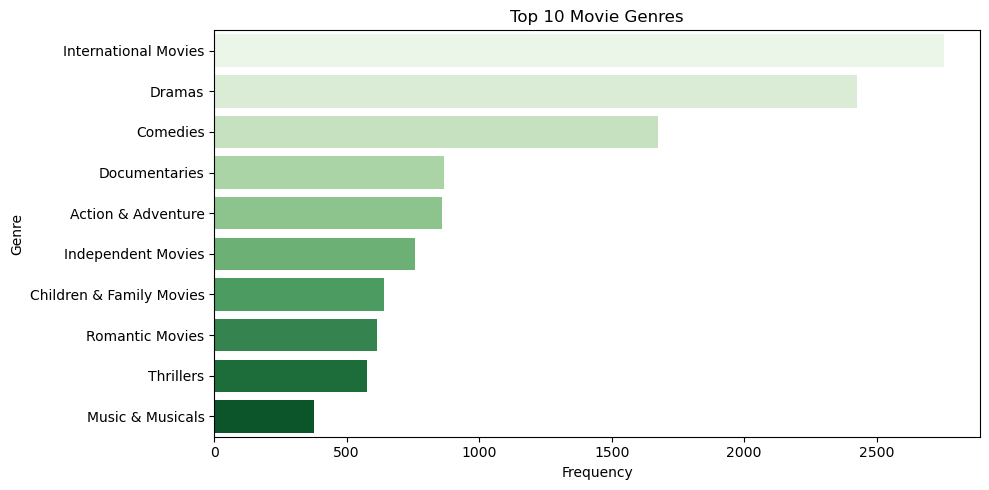

C:\Users\hp\AppData\Local\Temp\ipykernel_14448\219989840.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_genres.values, y=tv_genres.index, palette='Purples')


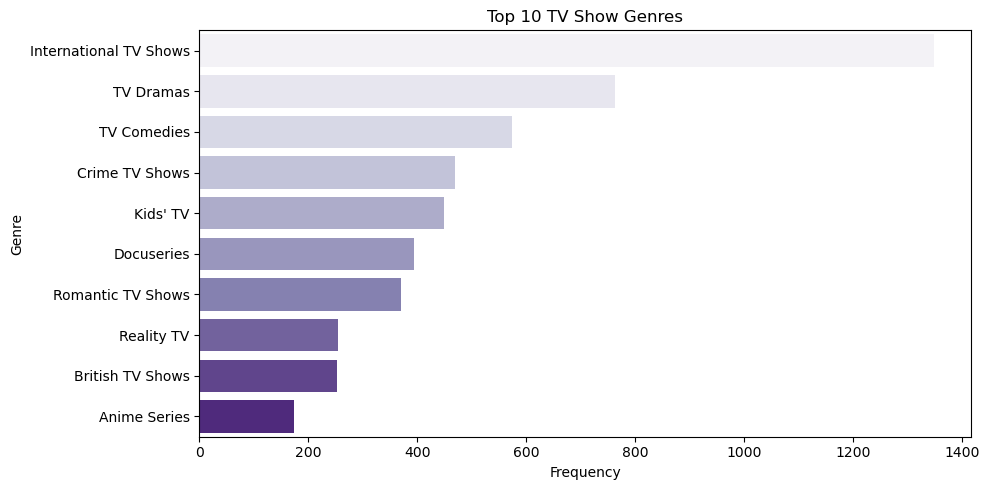

In [13]:
#Step 7: Popular Genres (Movies vs TV Shows)
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))

# Top genres for Movies
movie_genres = df[df['type'] == 'Movie']['genres'].explode().value_counts().head(10)
tv_genres = df[df['type'] == 'TV Show']['genres'].explode().value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=movie_genres.values, y=movie_genres.index, palette='Greens')
plt.title("Top 10 Movie Genres")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=tv_genres.values, y=tv_genres.index, palette='Purples')
plt.title("Top 10 TV Show Genres")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_14448\2955967720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


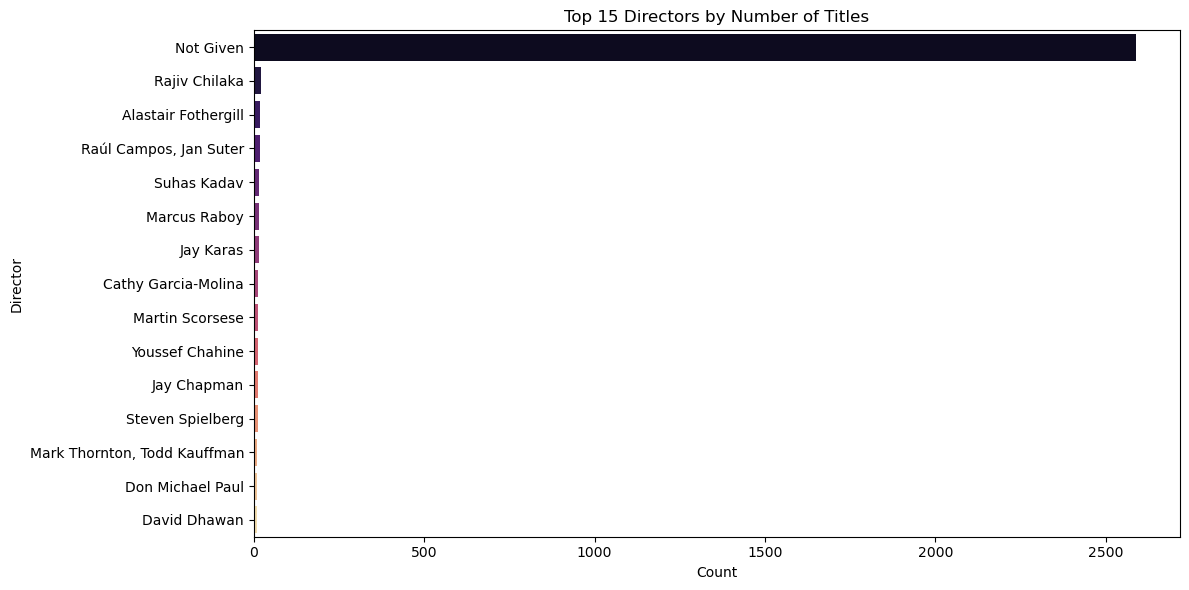

In [15]:
# Step 8: Top 15 Directors by Count
top_directors = df['director'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title("Top 15 Directors by Number of Titles")
plt.xlabel("Count")
plt.ylabel("Director")
plt.tight_layout()
plt.show()
